# Estudo de caso: Suicídios no Brasil em 2018

**Análise Exploratória de Dados utilizando Python**

**[João Victor Lopes](https://www.linkedin.com/in/joaovictorlopes1998/)**

![](https://www.jau.sp.gov.br/uploads/noticias/2018/09/11/100558/suicidio1.jpg.jpg)

**Segundo dados da Organização Mundial da Saúde (OMS), mais de 700 mil pessoas morrem por ano devido ao suicídio, o que representa uma a cada 100 mortes registradas.** 

**Quais foram os números no Brasil em 2018?**

Iniciamos nossa análise com a importação das bibliotecas que iremos utilizar:

In [56]:
import pandas as pd
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

Carregamos nossa base de dados na variável df_geral

In [2]:
df_geral = pd.read_csv("../input/dados-de-suicdio-no-brasil-2014-a-2018/datasus_suicidio_2014_2018.csv", sep = ",", encoding = 'latin-1')
df_geral

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


Criamos nossa variável df_2018 filtrando a base de dados para apenas o ano de 2018

In [3]:
df_2018 = df_geral.loc[df_geral['ano'] == 2018]

Criamos nossa variável df_2018_suicidios filtrando a base de dados para apenas casos de suicídios e visualizando o resultado:

In [49]:
df_2018_suicidios = df_2018.loc[df_2018['CIRCOBITO'] == 'Suicídio']
df_2018_suicidios

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
45870,AC,2018,Suicídio,06-11-18,13-02-94,Masculino,Indígena,Solteiro,Nenhuma,TRABALHADOR VOLANTE DA AGRICULTURA,Manoel Urbano,Via pública,Não,X700,X700,24.0,11
45871,AC,2018,Suicídio,02-01-18,17-06-97,Masculino,Parda,União consensual,8 a 11 anos,DESEMPREGADO CRONICO,Feijó,Domicílio,NaN,X709,X70,21.0,1
45872,AC,2018,Suicídio,15-01-18,14-01-90,Masculino,Parda,União consensual,4 a 7 anos,0,Marechal Thaumaturgo,Domicílio,NaN,X700,X700,28.0,1
45873,AC,2018,Suicídio,17-03-18,07-01-82,Masculino,Parda,União consensual,NaN,TRABALHADOR VOLANTE DA AGRICULTURA,Marechal Thaumaturgo,Domicílio,NaN,X700,X700,36.0,3
45874,AC,2018,Suicídio,27-03-18,05-07-76,Feminino,Parda,União consensual,12 e mais,0,Marechal Thaumaturgo,Domicílio,Não,X700,X700,42.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [48]:
df_2018_suicidios.shape

print("Nossa base tem", df_2018_suicidios.shape[0], "linhas e", df_2018_suicidios.shape[1], "colunas.")

Nossa base tem 12252 linhas e 17 colunas.


Avaliando as colunas que possuem dados nulos:

In [5]:
df_2018_suicidios.isnull().sum()

estado           0
ano              0
CIRCOBITO        0
DTOBITO          0
DTNASC          44
SEXO             4
RACACOR        175
ESTCIV         917
ESC           2673
OCUP             0
CODMUNRES        0
LOCOCOR         25
ASSISTMED     3207
CAUSABAS         0
CAUSABAS_O      12
idade           44
mes              0
dtype: int64

Iremos substituir os valores nulos pelos valores mais frequentes de cada coluna respectiva:

In [6]:
sts.mode(df_2018_suicidios['RACACOR'])

'Branca'

In [7]:
sts.mode(df_2018_suicidios['ESTCIV'])

'Solteiro'

In [8]:
sts.mode(df_2018_suicidios['ESC'])

'8 a 11 anos'

In [9]:
sts.mode(df_2018_suicidios['ASSISTMED'])

'Não'

In [10]:
df_2018_suicidios['RACACOR'].fillna('Branca', inplace = True)
df_2018_suicidios['ESTCIV'].fillna('Solteiro', inplace = True)
df_2018_suicidios['ESC'].fillna('8 a 11 anos', inplace = True)
df_2018_suicidios['ASSISTMED'].fillna('Não', inplace = True)


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [11]:
df_2018_suicidios.dropna(inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Analisamos se ainda possuimos valores nulos:

In [12]:
df_2018_suicidios.isnull().sum()

estado        0
ano           0
CIRCOBITO     0
DTOBITO       0
DTNASC        0
SEXO          0
RACACOR       0
ESTCIV        0
ESC           0
OCUP          0
CODMUNRES     0
LOCOCOR       0
ASSISTMED     0
CAUSABAS      0
CAUSABAS_O    0
idade         0
mes           0
dtype: int64

Mortes por suicídio representaram 0,95% do total de mortes em 2018:

In [13]:
num_ocorrencias = df_2018_suicidios['CIRCOBITO'].count()
mortes = 1279948

representacao_suicidios_total = (num_ocorrencias / mortes) * 100
representacao_suicidios_total




0.9508980052314625

São Paulo, Minas Gerais, Rio Grande do Sul, Paraná e Santa Catarina são os estados que registram mais suicídios em 2018:

Text(0, 0.5, 'Estados')

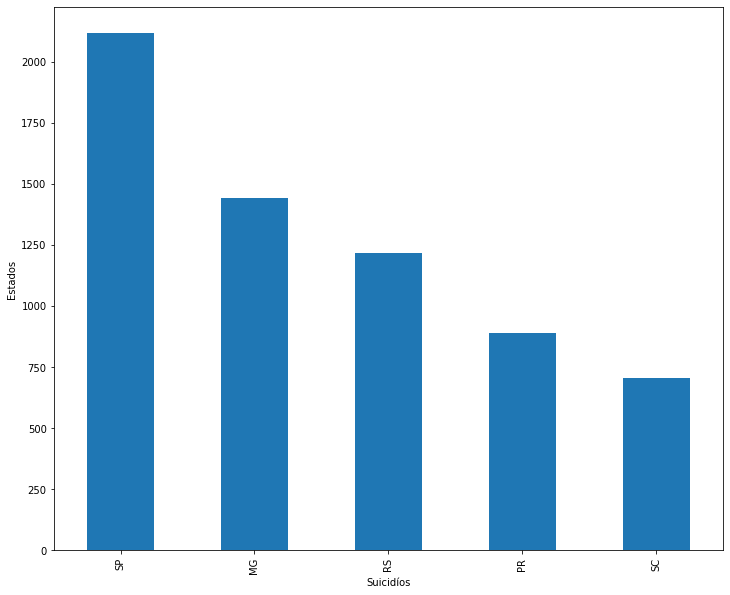

In [14]:
suicidios_por_estado = df_2018_suicidios.groupby('estado')['CIRCOBITO'].size().sort_values(ascending = False).head(5)
plt.figure(figsize = ((12, 10)))
suicidios_por_estado.plot.bar("estado", width = 0.5, linewidth = 9.5)
plt.xlabel('Suicidíos')
plt.ylabel('Estados')

Os homens ocuparam quase 4 vezes mais registros de suicídios que as mulheres:

Text(0, 0.5, 'Sexo')

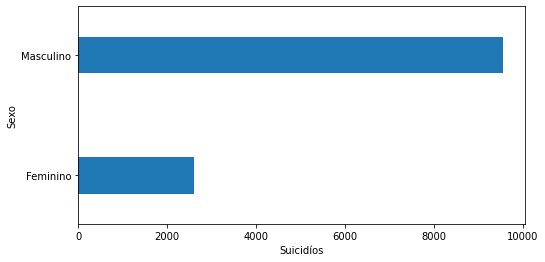

In [15]:
plt.figure(figsize = ((8, 4)))
suicidios_por_sexo = df_2018_suicidios.groupby('SEXO')['CIRCOBITO'].size().sort_values(ascending = True)
suicidios_por_sexo.plot.barh("sexo", width = 0.3, linewidth = 5)
plt.xlabel('Suicidíos')
plt.ylabel('Sexo')

Comparamos a população e o número de ocorrências por raça:

Text(0, 0.5, 'População em milhões de habitantes')

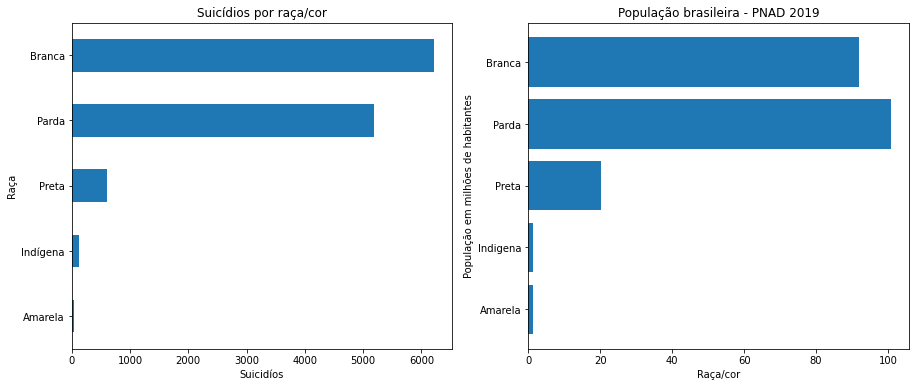

In [16]:
suicidios_por_raca = df_2018_suicidios.groupby('RACACOR')['CIRCOBITO'].size().sort_values(ascending = True)
plt.figure(figsize = ((15, 6)))
plt.subplot(1, 2, 1)
suicidios_por_raca.plot.barh("sexo", width = 0.5, linewidth = 7)
plt.title('Suicídios por raça/cor')
plt.xlabel('Suicidíos')
plt.ylabel('Raça')
plt.subplot(1, 2, 2)
pop_branca = 91885671/1000000
pop_parda = 100708417/1000000
pop_preta = 20227759/1000000
pop_indigena = 1183539/1000000
pop_amarela = 1183539/1000000
racas = ['Amarela', 'Indigena', 'Preta', 'Parda', 'Branca']
populacao = [pop_amarela, pop_indigena, pop_preta, pop_parda, pop_branca]
plt.barh(racas, populacao)
plt.title("População brasileira - PNAD 2019")
plt.xlabel('Raça/cor')
plt.ylabel('População em milhões de habitantes')

Análise de ocorrências por estado civil:

Text(0, 0.5, 'Estado Civil')

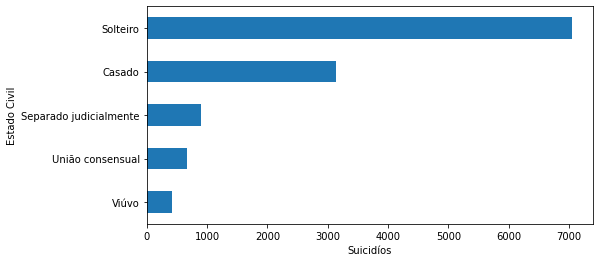

In [17]:
suicidios_por_estado_civil = df_2018_suicidios.groupby('ESTCIV')['CIRCOBITO'].size().sort_values(ascending = True)
plt.figure(figsize = ((8, 4)))
suicidios_por_estado_civil.plot.barh("sexo", width = 0.5, linewidth = 7)
plt.xlabel('Suicidíos')
plt.ylabel('Estado Civil')

Análise de ocorrências por escolaridade:

Text(0, 0.5, 'Escolaridade')

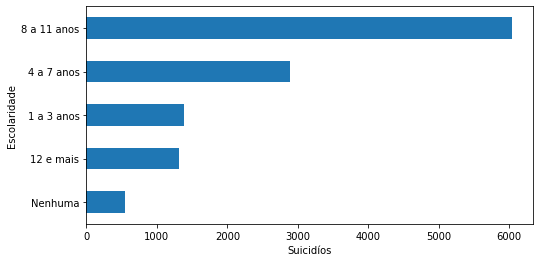

In [18]:
suicidios_por_escolaridade = df_2018_suicidios.groupby('ESC')['CIRCOBITO'].size().sort_values(ascending = True)
plt.figure(figsize = ((8, 4)))
suicidios_por_escolaridade.plot.barh("sexo", width = 0.5, linewidth = 7)
plt.xlabel('Suicidíos')
plt.ylabel('Escolaridade')

Podemos observar que a maior concentração de registros está na faixa dos 35-40 anos:

Text(0, 0.5, 'Contagem')

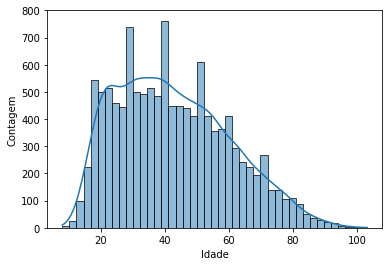

In [19]:
sns.histplot(x = df_2018_suicidios['idade'], kde = True)
plt.xlabel("Idade")
plt.ylabel("Contagem")

Aqui temos um ocupação sem identificação (ocupação 0), mas temos um número expressivo de valores conhecidos, estudante e aposentado/pensionista.

Text(0, 0.5, 'Ocupação')

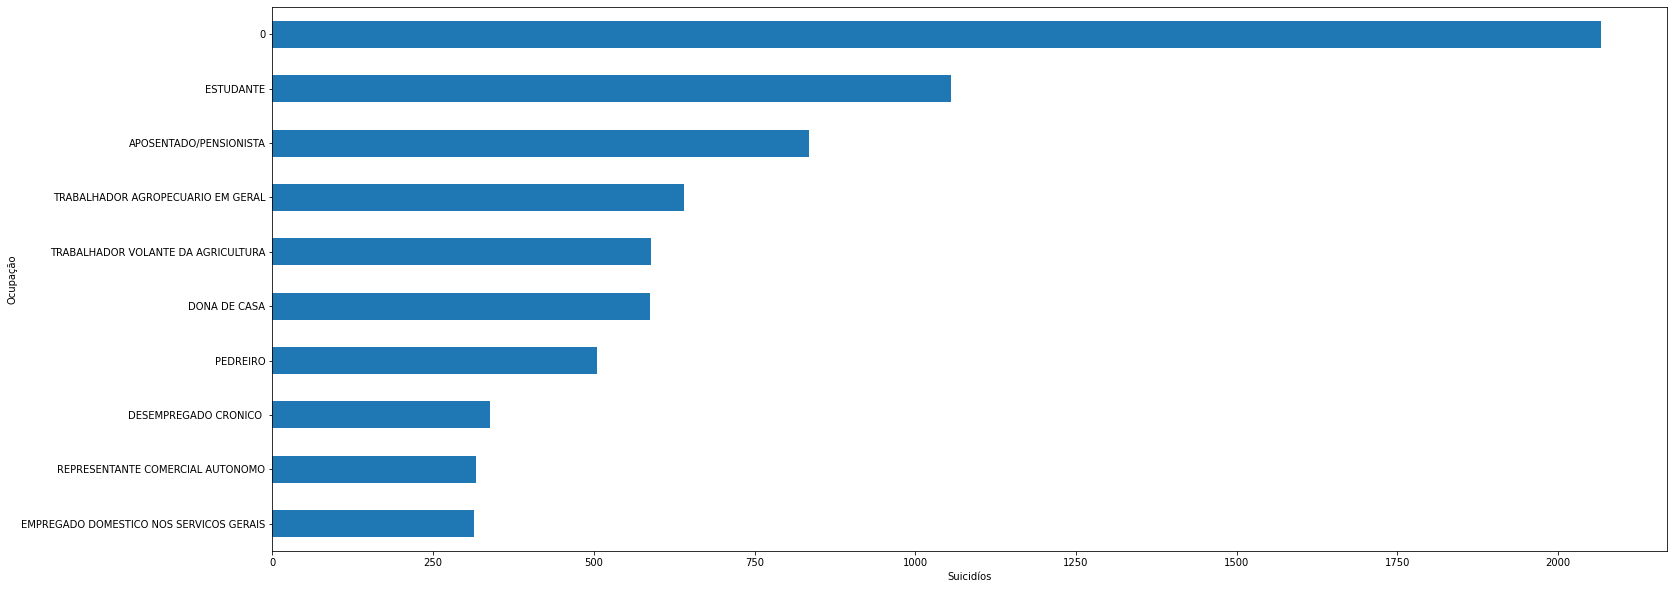

In [20]:
suicidios_por_ocupacao = df_2018_suicidios.groupby('OCUP')['CIRCOBITO'].size().sort_values(ascending = True).tail(10)
plt.figure(figsize = ((25, 10)))
suicidios_por_ocupacao.plot.barh("sexo", width = 0.5, linewidth = 7)
plt.xlabel('Suicidíos')
plt.ylabel('Ocupação')

A cidade Rio de Janeiro registrou o maior número de casos de suicídios:

Text(0, 0.5, 'Municipios')

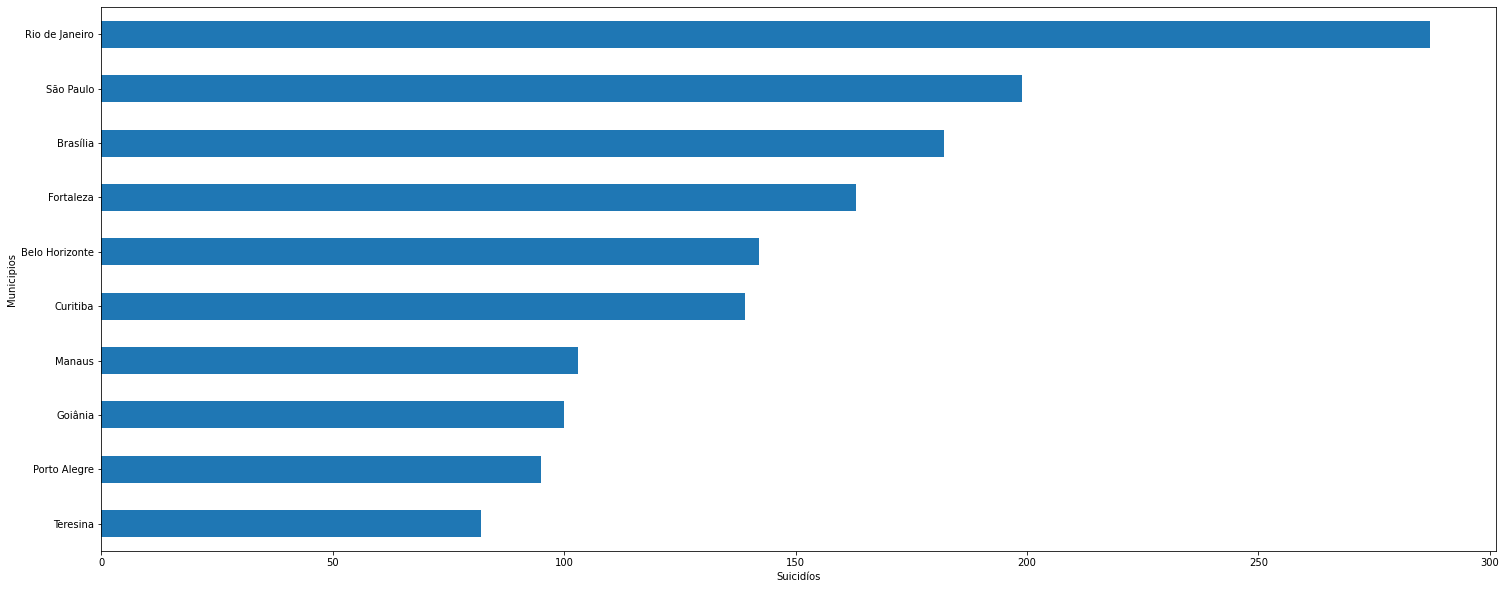

In [21]:
suicidios_por_municipio = df_2018_suicidios.groupby('CODMUNRES')['CIRCOBITO'].size().sort_values(ascending = True).tail(10)
plt.figure(figsize = ((25, 10)))
suicidios_por_municipio.plot.barh("sexo", width = 0.5, linewidth = 7)
plt.xlabel('Suicidíos')
plt.ylabel('Municipios')

Ocorrências por local de ocorrência:

Text(0, 0.5, 'Local de ocorrência')

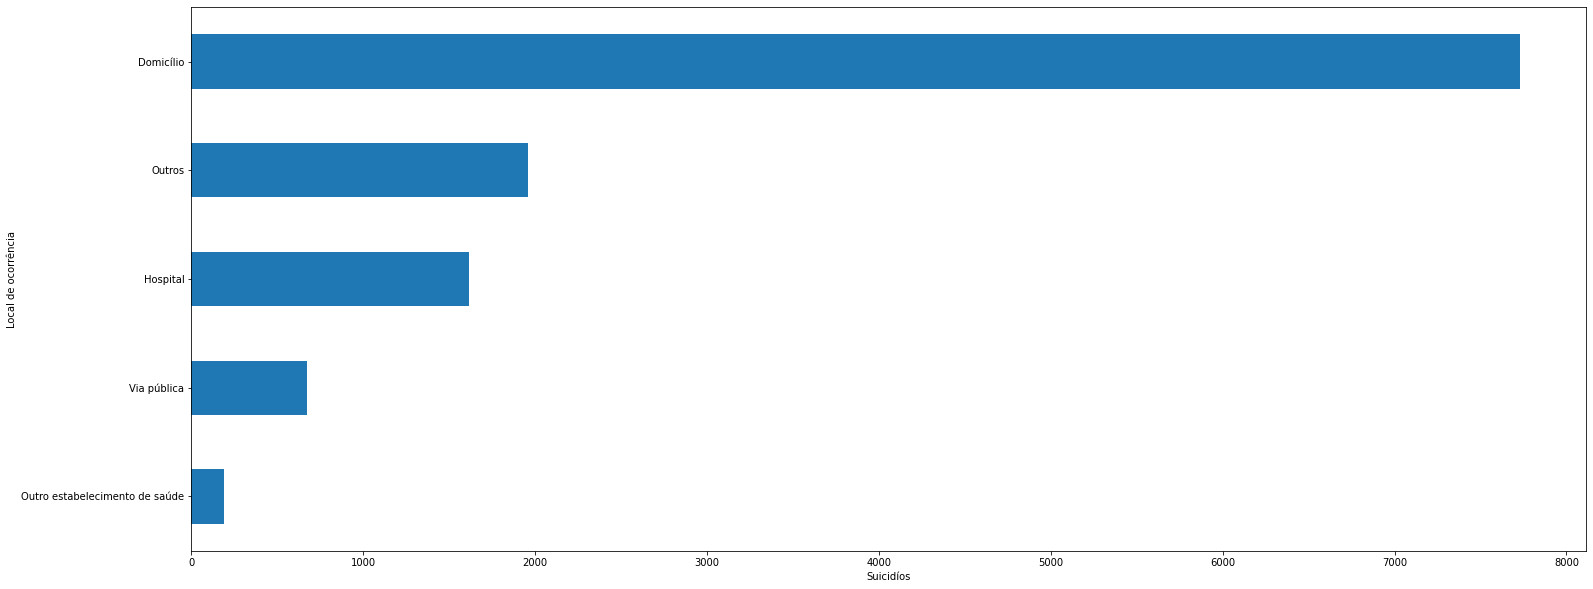

In [22]:
suicidios_por_local = df_2018_suicidios.groupby('LOCOCOR')['CIRCOBITO'].size().sort_values(ascending = True)
plt.figure(figsize = ((25, 10)))
suicidios_por_local.plot.barh("sexo", width = 0.5, linewidth = 7)
plt.xlabel('Suicidíos')
plt.ylabel('Local de ocorrência')

Um resumo da coluna idades:

In [23]:
df_2018_suicidios['idade'].describe()

count    12171.000000
mean        42.616055
std         17.515953
min          8.000000
25%         29.000000
50%         41.000000
75%         55.000000
max        103.000000
Name: idade, dtype: float64

Um olhar mais detalhado para a cidade que mais registrou suicídios em 2018, Rio de Janeiro:

In [24]:
rio_de_janeiro_suicidios = df_2018_suicidios.loc[df_2018_suicidios['CODMUNRES'] == 'Rio de Janeiro']
rio_de_janeiro_suicidios

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
53129,RJ,2018,Suicídio,23-02-18,23-04-83,Masculino,Branca,Solteiro,8 a 11 anos,"RECEPCIONISTA, EM GERAL",Rio de Janeiro,Outros,Não,X709,X709,35.0,2
53130,RJ,2018,Suicídio,14-01-18,02-01-96,Masculino,Branca,Solteiro,12 e mais,ESTUDANTE,Rio de Janeiro,Domicílio,Não,X700,Y200,22.0,1
53133,RJ,2018,Suicídio,04-01-18,06-03-94,Feminino,Branca,Solteiro,12 e mais,VENDEDOR DE COMERCIO VAREJISTA,Rio de Janeiro,Outros,Não,X748,X748,24.0,1
53134,RJ,2018,Suicídio,07-01-18,30-10-66,Masculino,Parda,Solteiro,1 a 3 anos,PEDREIRO,Rio de Janeiro,Domicílio,Não,X780,Y340,52.0,1
53135,RJ,2018,Suicídio,08-01-18,17-09-72,Masculino,Branca,Solteiro,8 a 11 anos,VENDEDOR EM COMERCIO ATACADISTA,Rio de Janeiro,Outros,Não,X708,Y208,46.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53786,RJ,2018,Suicídio,28-12-18,22-04-95,Masculino,Branca,Solteiro,12 e mais,ESTUDANTE,Rio de Janeiro,Domicílio,Não,X849,R99,23.0,12
53787,RJ,2018,Suicídio,31-12-18,21-10-99,Masculino,Branca,Solteiro,8 a 11 anos,0,Rio de Janeiro,Domicílio,Não,X700,Y200,19.0,12
53806,RJ,2018,Suicídio,15-12-18,13-02-36,Feminino,Branca,Casado,4 a 7 anos,DONA DE CASA,Rio de Janeiro,Hospital,Sim,X749,X749,82.0,12
53809,RJ,2018,Suicídio,22-11-18,09-02-65,Masculino,Branca,Solteiro,8 a 11 anos,0,Rio de Janeiro,Outros,Não,X849,R99,53.0,11


Análise por sexo, homens registraram mais que o dobro de suicídios do que as mulheres:

Text(0.5, 1.0, 'Suicídios por Sexo - Rio de Janeiro')

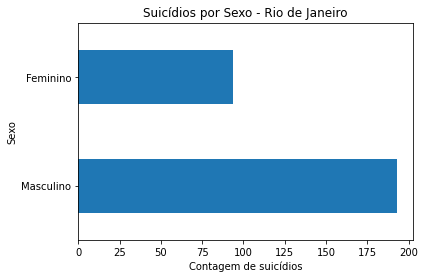

In [25]:
rio_janeiro_por_sexo = rio_de_janeiro_suicidios.groupby('SEXO')['CIRCOBITO'].size().sort_values(ascending = False)

rio_janeiro_por_sexo.plot.barh("sexo")
plt.xlabel("Contagem de suicídios")
plt.ylabel("Sexo")
plt.title("Suicídios por Sexo - Rio de Janeiro")

Análise por raça:

Text(0.5, 1.0, 'Suicídios por Raça - Rio de Janeiro')

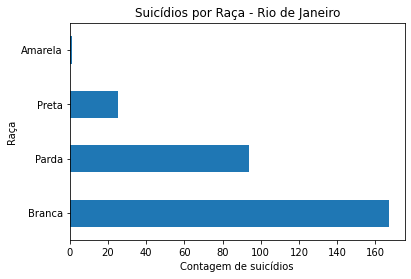

In [26]:
rio_janeiro_por_raca = rio_de_janeiro_suicidios.groupby('RACACOR')['CIRCOBITO'].size().sort_values(ascending = False)

rio_janeiro_por_raca.plot.barh("Raça")
plt.xlabel("Contagem de suicídios")
plt.ylabel("Raça")
plt.title("Suicídios por Raça - Rio de Janeiro")

Análise por estado civil:

Text(0.5, 1.0, 'Suicídios por Estado Civil - Rio de Janeiro')

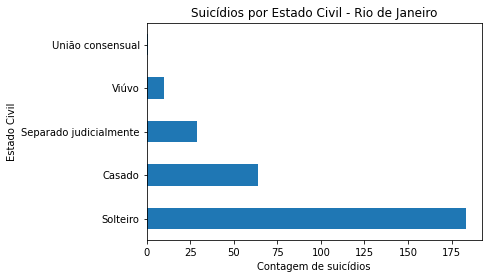

In [27]:
rio_janeiro_por_estadocivil = rio_de_janeiro_suicidios.groupby('ESTCIV')['CIRCOBITO'].size().sort_values(ascending = False)
rio_janeiro_por_estadocivil.plot.barh("Estado Civil")
plt.xlabel("Contagem de suicídios")
plt.ylabel("Estado Civil")
plt.title("Suicídios por Estado Civil - Rio de Janeiro")

Análise por ocupação:

Text(0.5, 1.0, 'Suicídios por Ocupação - Rio de Janeiro')

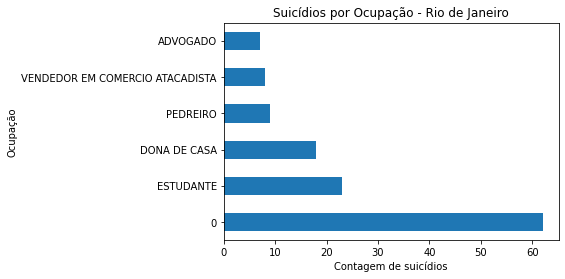

In [28]:
rio_janeiro_por_ocupacao = rio_de_janeiro_suicidios.groupby('OCUP')['CIRCOBITO'].size().sort_values(ascending = False).head(6)
rio_janeiro_por_ocupacao.plot.barh("Ocupacao")
plt.xlabel("Contagem de suicídios")
plt.ylabel("Ocupação")
plt.title("Suicídios por Ocupação - Rio de Janeiro")

Criando as variáveis ocorr_ano para analisar a evolução dentre os anos 2014 e 2018:

In [50]:
ocorr_2014 = df_geral.loc[df_geral['ano'] == 2014]
ocorr_2015 = df_geral.loc[df_geral['ano'] == 2015]
ocorr_2016 = df_geral.loc[df_geral['ano'] == 2016]
ocorr_2017 = df_geral.loc[df_geral['ano'] == 2017]
ocorr_2018 = df_geral.loc[df_geral['ano'] == 2018]

suicidios_2014 = ocorr_2014.loc[ocorr_2014['CIRCOBITO'] == 'Suicídio']
suicidios_2015 = ocorr_2015.loc[ocorr_2015['CIRCOBITO'] == 'Suicídio']
suicidios_2016 = ocorr_2016.loc[ocorr_2016['CIRCOBITO'] == 'Suicídio']
suicidios_2017 = ocorr_2017.loc[ocorr_2017['CIRCOBITO'] == 'Suicídio']
suicidios_2018 = ocorr_2018.loc[ocorr_2018['CIRCOBITO'] == 'Suicídio']



In [51]:
num_2014 = suicidios_2014.CIRCOBITO.count()
num_2015 = suicidios_2015.CIRCOBITO.count()
num_2016 = suicidios_2016.CIRCOBITO.count()
num_2017 = suicidios_2017.CIRCOBITO.count()
num_2018 = suicidios_2018.CIRCOBITO.count()
anos = ['2014', '2015', '2016', '2017', '2018']
ocorrencias_comparativo = [num_2014, num_2015, num_2016, num_2017, num_2018]

Evolução dos suicídios entre os anos 2014 e 2018. Podemos observar que saímos de 10.250 para 12.250, o que explicaria esse aumento?

Text(0.5, 1.0, 'Casos de suicídio no Brasil ao longo dos anos')

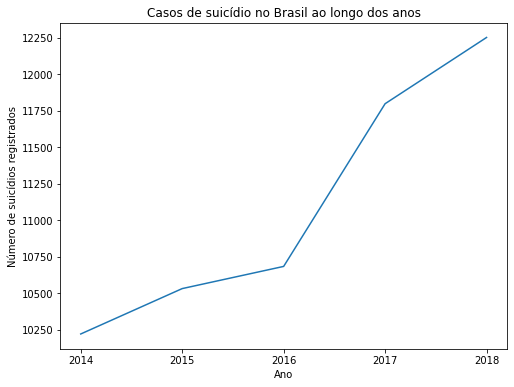

In [31]:
plt.figure(figsize = ((8, 6)))
plt.plot(anos, ocorrencias_comparativo)
plt.xlabel('Ano')
plt.ylabel('Número de suicídios registrados')
plt.title('Casos de suicídio no Brasil ao longo dos anos')


O Brasil estava em 16º no ranking do Happiness Score em 2014. Em 2018 saltamos para a 28º posição.

In [53]:
happiness2015 = pd.read_csv("../input/world-happiness/2015.csv")
happiness2015_brasil = happiness2015.loc[happiness2015['Country'] == 'Brazil']
happiness2018 = pd.read_csv("../input/world-happiness/2018.csv")
happiness2018_brasil = happiness2018.loc[happiness2018['Country or region'] == 'Brazil']




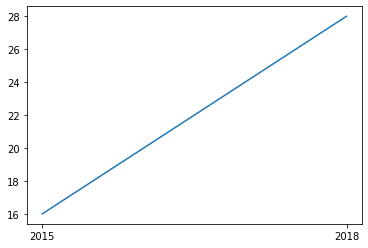

In [55]:
anos_2 = ['2015', '2018']
posicao_brasil = [happiness2015_brasil['Happiness Rank'].squeeze(), happiness2018_brasil['Overall rank'].squeeze()]
plt.plot(anos_2, posicao_brasil)

Nosso Happiness Score foi de 6.983 para 6.419 entre os anos de 2015 e 2018:

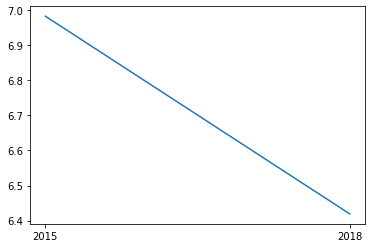

In [35]:
score_anos = [happiness2015_brasil['Happiness Score'], happiness2018_brasil['Score']]
plt.plot(anos_2, score_anos)